In [1]:
#predicting closing price of apple from historic 60 days data by using LSTM 
#implementing a neural network for this 

In [2]:
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')


In [3]:
#get the stock quote

df=pdr.get_data_yahoo('AAPL',start='2012-01-01',end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.610315
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.678085
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.818838
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.952841
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.932299
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.799057
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.969292
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.879601


In [4]:
# get the numbers of rows and columns
df.shape

(2003, 6)

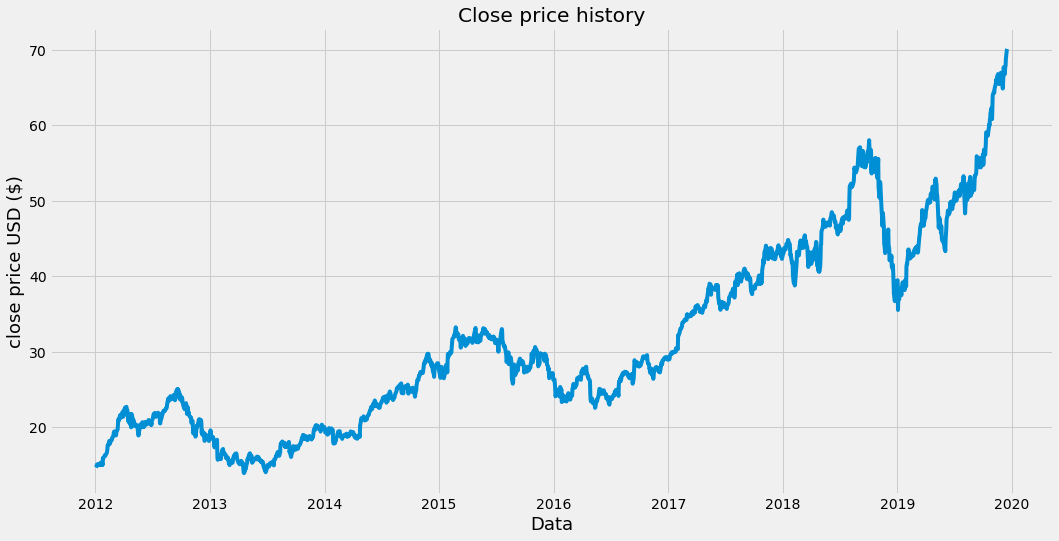

In [5]:
#visualize some data(closing price history)
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Data',fontsize=18)
plt.ylabel('close price USD ($)',fontsize=18)
plt.show()


In [6]:
#new dataframe with only close column
data = df.filter(['Close'])
#df to np array
dataset=np.array(data)
#get the number of rows to train
train_data_length=math.ceil(len(dataset) * .8)

train_data_length

1603

In [7]:
#scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [8]:
#create the training the dataset
#create the scaled training data set
train_data = scaled_data[0:train_data_length,:]
#split the data
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()


[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]



In [9]:
#Convert x_train and y_train to numpy arrays to LSTM
x_train,y_train=np.array(x_train),np.array(y_train)

In [10]:
#reshape the data
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [23]:
#build the LSTM model
model = Sequential()
model.add(LSTM(70,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(70,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [24]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [26]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1543/1543 [==============================] - 54s 35ms/step - loss: 2.5535e-04


In [27]:
#create the testing data set
#create a new array containing scaled values from 1542 to 2002
test_data = scaled_data[train_data_length-60:,:]
#create the data sets
x_test=[]
y_test=dataset[train_data_length:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  


In [28]:
#convert data to a numpy array
x_test=np.array(x_test)


In [29]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [30]:
#get the predicitions(price values)
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)



In [31]:
#get the root mean squared error(RMSE)
rmse = np.sqrt(((predictions - y_test) ** 2).mean())
rmse


1.0848108048647265

<ipython-input-32-f6e0358854a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


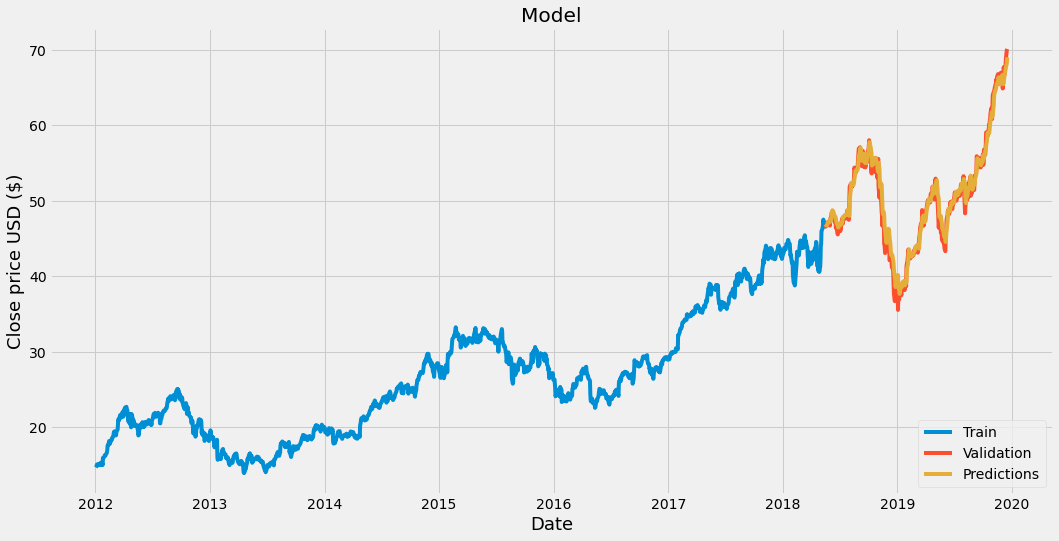

In [32]:
#plot the data
train = data[:train_data_length]
valid = data[train_data_length:]
valid['Predictions'] = predictions
#visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Validation','Predictions'],loc='lower right')
plt.show()

In [33]:
#show the valid and predictions
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,46.882404
2018-05-18,46.577499,46.817139
2018-05-21,46.907501,46.732819
2018-05-22,46.790001,46.826401
2018-05-23,47.090000,46.910004
...,...,...
2019-12-11,67.692497,67.103577
2019-12-12,67.864998,67.406616
2019-12-13,68.787498,67.662689


In [34]:
#get the quote
apple_quote = pdr.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')
#create a new dataframe 
new_df = apple_quote.filter(['Close'])
#get the last 60 days closing price values and convert df to array
last_60_days = new_df[-60:].values
#scale the data values b/w 0,1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test=[]
#append the past 60 days
X_test.append(last_60_days_scaled)
#convert X_test to np array
X_test=np.array(X_test)
#reshape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get the predicted scaled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
pred_price


array([[69.603935]], dtype=float32)

In [35]:
apple_quote2 = pdr.DataReader('AAPL',data_source='yahoo',start='2019-12-18',end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-17    70.102501
2019-12-18    69.934998
Name: Close, dtype: float64
